## Import Libries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import fasttext
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

## EDA & Preprocessing data

In [3]:
df = pd.read_json("News_Category_Dataset_v3.json",lines = True)

df.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [4]:
df.dtypes, df.shape

(link                         object
 headline                     object
 category                     object
 short_description            object
 authors                      object
 date                 datetime64[ns]
 dtype: object,
 (209527, 6))

In [5]:
df['category'].value_counts()

POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATION       

In [6]:
df['New_category'] = df['category'].replace({
                        # 1. "News and Current Affairs"
                        'THE WORLDPOST': 'News_and_Current_Affairs',
                        'WORLDPOST': 'News_and_Current_Affairs',
                        'WORLD NEWS': 'News_and_Current_Affairs',
                        'U.S. NEWS': 'News_and_Current_Affairs',
                        'POLITICS': 'News_and_Current_Affairs',
                        'ENVIRONMENT': 'News_and_Current_Affairs',
                        'SCIENCE': 'News_and_Current_Affairs',
                        'CRIME': 'News_and_Current_Affairs',
                        'WORLDPOST': 'News_and_Current_Affairs',
                        'EDUCATION': 'News_and_Current_Affairs',
    
                        # 2. "Lifestyle and Culture"
                        'COMEDY': 'Lifestyle_and_Culture',
                        'CULTURE & ARTS': 'Lifestyle_and_Culture',
                        'ENTERTAINMENT': 'Lifestyle_and_Culture',
                        'STYLE & BEAUTY': 'Lifestyle_and_Culture',
                        'FOOD & DRINK': 'Lifestyle_and_Culture',
                        'MEDIA': 'Lifestyle_and_Culture',
                        'WEIRD NEWS': 'Lifestyle_and_Culture',
                        'TRAVEL': 'Lifestyle_and_Culture',
                        'STYLE & BEAUTY': 'Lifestyle_and_Culture',
                        'STYLE': 'Lifestyle_and_Culture',
                        'HOME & LIVING': 'Lifestyle_and_Culture',
                        'ARTS & CULTURE': 'Lifestyle_and_Culture',
                        'TASTE': 'Lifestyle_and_Culture',
                        'HEALTHY LIVING': 'Lifestyle_and_Culture',
                        'GOOD NEWS': 'Lifestyle_and_Culture',
                        'FIFTY': 'Lifestyle_and_Culture',
                        'ARTS': 'Lifestyle_and_Culture',
    
                        # 3. "Health and Wellness"
                        'WELLNESS': 'Health_and_Wellness',
                        'PARENTING': 'Health_and_Wellness',
                        'PARENTS': 'Health_and_Wellness',
                        'WEDDINGS': 'Health_and_Wellness',
                        'DIVORCE': 'Health_and_Wellness',
                        'COLLEGE': 'Health_and_Wellness',
    
                        # 4. "Diversity and Voices"
                        'LATINO VOICES': 'Diversity_and_Voices',
                        'BLACK VOICES': 'Diversity_and_Voices',
                        'QUEER VOICES': 'Diversity_and_Voices',
                        'WOMEN': 'Diversity_and_Voices',
    
                        # 5. "Business and Finance"
                        'TECH': 'Business_and_Finance',
                        'MONEY': 'Business_and_Finance',
                        'BUSINESS': 'Business_and_Finance',
    
                        # 6. "Special Interest"
                        'IMPACT': 'Special_Interest',
                        'RELIGION': 'Special_Interest',
                        
                        # 7. "Specific Topics"
                        'SPORTS': 'Specific_Topics',
                        'EDUCATION': 'Specific_Topics',
                        'GREEN': 'Specific_Topics',
                       })

In [7]:
df['New_category'].unique(), df['New_category'].nunique()

(array(['News_and_Current_Affairs', 'Lifestyle_and_Culture',
        'Health_and_Wellness', 'Business_and_Finance', 'Specific_Topics',
        'Diversity_and_Voices', 'Special_Interest'], dtype=object),
 7)

In [8]:
df['num_category'] = df['New_category'].map({'News_and_Current_Affairs': '0', 
                             'Lifestyle_and_Culture': '1',
                             'Health_and_Wellness': '2', 
                             'Business_and_Finance': '3', 
                             'Specific_Topics': '4',
                             'Diversity_and_Voices': '5',
                             'Special_Interest': '6'
                            })

In [9]:
df['num_category'].unique()

array(['0', '1', '2', '3', '4', '5', '6'], dtype=object)

In [10]:
df.duplicated(['headline','short_description']).sum()

489

In [11]:
df.drop_duplicates(['headline','short_description'], inplace = True)

In [12]:
df[df['headline'] == '']


,link,headline,category,short_description,authors,date,New_category,num_category
90944,https://www.huffingtonpost.com/entry/lincoln-2...,,POLITICS,,"Robert Moran, ContributorRobert Moran leads Br...",2015-08-22,News_and_Current_Affairs,0
95567,https://www.huffingtonpost.com/entry/post_9671...,,RELIGION,Let everyone not wrapped in tired and disprove...,"Matthew Fox, ContributorRadical theologian Mat...",2015-06-30,Special_Interest,6


In [13]:
df[df['short_description'] == '']

,link,headline,category,short_description,authors,date,New_category,num_category
20773,https://www.huffingtonpost.com/entry/the-big-b...,The Big Blue Wave,COMEDY,,"Shan Wells, ContributorSciency sun venerator +...",2017-11-10,Lifestyle_and_Culture,1
21523,https://www.huffingtonpost.com/entry/inside-ru...,"Inside Rukban Camp, One Of Syria’s Most Desper...",WORLD NEWS,,"Yasser Allawi, Syria Deeply",2017-10-31,News_and_Current_Affairs,0
22793,https://www.huffingtonpost.com/entry/syrian-re...,Syrian Refugees Return From Lebanon Only To Fl...,WORLD NEWS,,"Abby Sewell, Refugees Deeply",2017-10-14,News_and_Current_Affairs,0
32223,https://www.huffingtonpost.com/entry/your-guid...,Your Guide To The Best BBQ In St. Louis Accord...,TASTE,,,2017-06-19,Lifestyle_and_Culture,1
34488,https://www.huffingtonpost.com/entry/the-bechd...,The Bechdel Test,COMEDY,,"Hilary Fitzgerald Campbell, ContributorHilary'...",2017-05-24,Lifestyle_and_Culture,1
...,...,...,...,...,...,...,...,...
206924,https://www.huffingtonpost.com/entry/true-lgbt...,True LGBTQ Stories: When A College Football Te...,QUEER VOICES,,"Nathan Manske, Contributor\nExecutive Director...",2012-02-25,Diversity_and_Voices,5
206939,https://www.huffingtonpost.com/entry/chasing-i...,'Chasing Ice' -- The Climate Change Debate Is ...,ENVIRONMENT,,"Greg Reitman, Contributor\nFounder of Blue Wat...",2012-02-25,News_and_Current_Affairs,0
208803,https://www.huffingtonpost.com/entry/love-is-l...,Practice for International Kissing Day: 'Love ...,IMPACT,,"Karen Dalton-Beninato, Contributor\nWriter Nea...",2012-02-05,Special_Interest,6
208865,https://www.huffingtonpost.com/entry/zach-hust...,"Zach Huston, Victim of Brutal Ohio School Bull...",QUEER VOICES,,"Ian Thompson, Contributor\nLegislative Represe...",2012-02-04,Diversity_and_Voices,5


In [14]:
df.drop([90944,95567], axis = 0, inplace = True)

In [15]:
df = df.loc[df['short_description'] != '']

In [16]:
df['New_category'].value_counts(),  df.shape

(Lifestyle_and_Culture       67943
 News_and_Current_Affairs    48080
 Health_and_Wellness         38212
 Diversity_and_Voices        13932
 Business_and_Finance         8937
 Specific_Topics              7360
 Special_Interest             4962
 Name: New_category, dtype: int64,
 (189426, 8))

In [17]:
df.reset_index(inplace = True, drop = True)

## Data Visualization

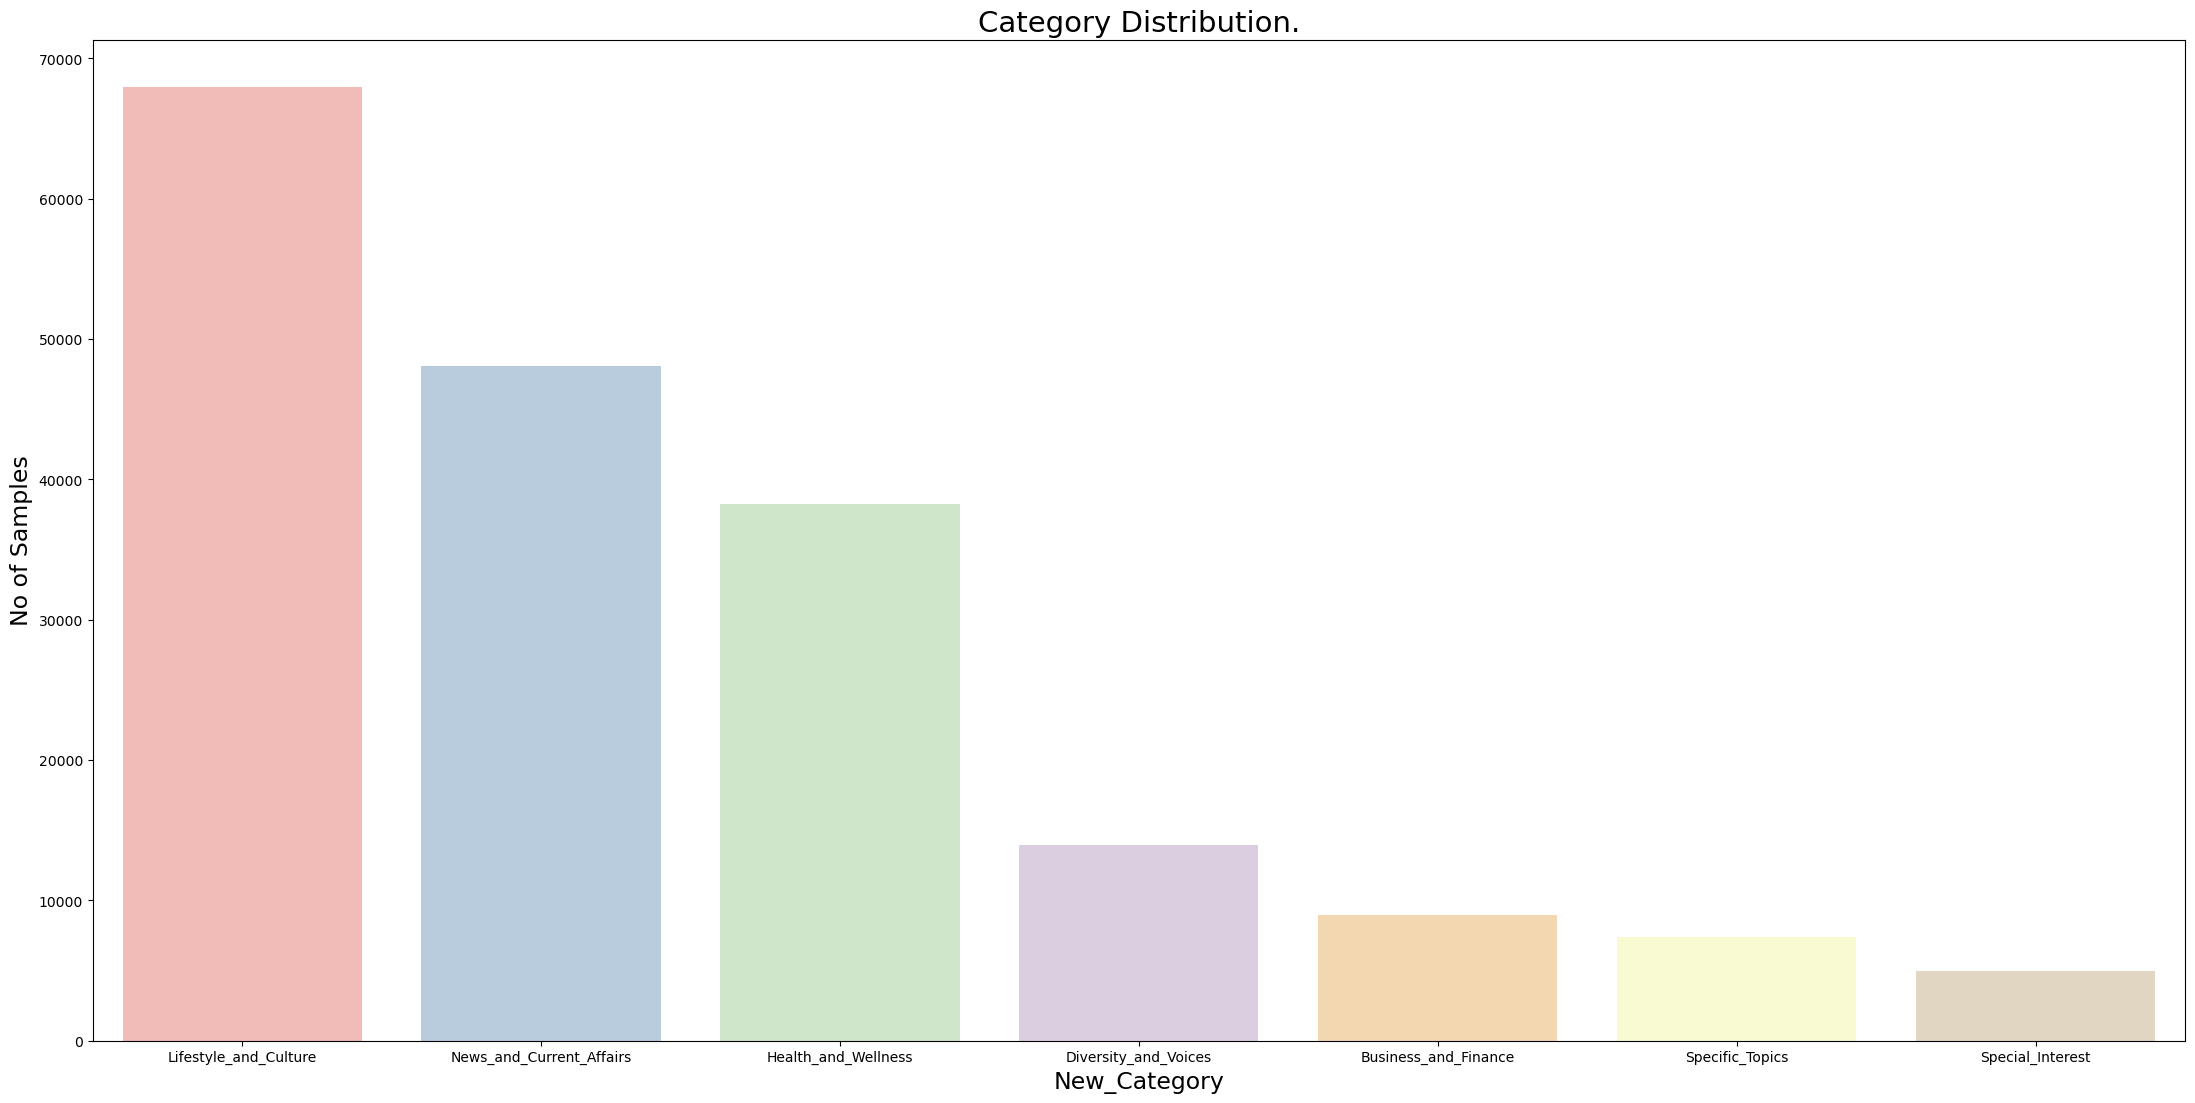

In [18]:
plt.figure(figsize = (27,13))
sns.barplot(x= df['New_category'].value_counts().index, y=df['num_category'].value_counts().values, 
            palette = 'Pastel1')
plt.title('Category Distribution.', fontsize = 21)
plt.xlabel('New_Category', fontsize = 17)
plt.ylabel('No of Samples', fontsize = 17)
plt.yticks(rotation = 0)
plt.show();

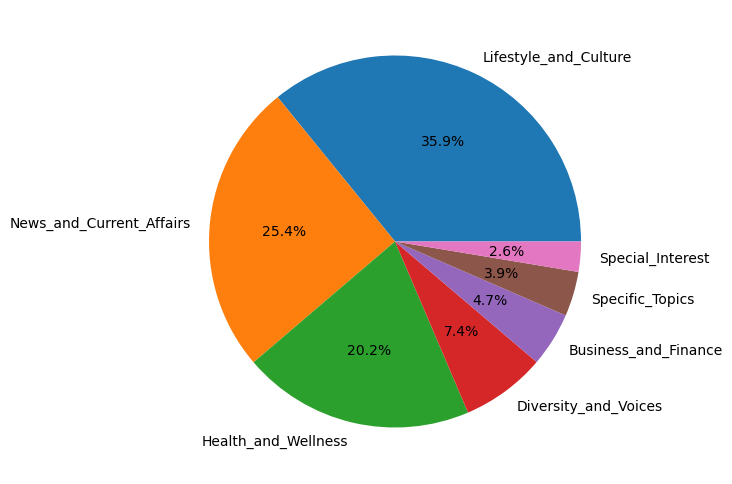

In [19]:
plt.figure(figsize = (6, 7))
plt.pie(df['num_category'].value_counts().values, autopct = "%1.1f%%", labels = df['New_category'].value_counts().index)
plt.show();

In [20]:
df.dtypes

link                         object
headline                     object
category                     object
short_description            object
authors                      object
date                 datetime64[ns]
New_category                 object
num_category                 object
dtype: object

In [21]:
df['headline_short_description'] = df['headline'] + "  " + df['short_description']

In [22]:
df['len_text'] = df['headline_short_description'].apply(lambda x: len(x))
df.head()

,link,headline,category,short_description,authors,date,New_category,num_category,headline_short_description,len_text
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23,News_and_Current_Affairs,0,Over 4 Million Americans Roll Up Sleeves For O...,232
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23,News_and_Current_Affairs,0,"American Airlines Flyer Charged, Banned For Li...",250
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23,Lifestyle_and_Culture,1,23 Of The Funniest Tweets About Cats And Dogs ...,135
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23,Health_and_Wellness,2,The Funniest Tweets From Parents This Week (Se...,217
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22,News_and_Current_Affairs,0,Woman Who Called Cops On Black Bird-Watcher Lo...,235


In [23]:
df.groupby('New_category')['len_text'].mean().reset_index().sort_values(by = 'len_text', ascending = False)

#It is better to calculate the mean instead of max or min as the mean gives a better understanding of the average length of news article(headline + short_description) for each category

,New_category,len_text
5,Special_Interest,219.420597
2,Health_and_Wellness,216.242411
0,Business_and_Finance,201.336466
1,Diversity_and_Voices,183.443009
6,Specific_Topics,181.005978
4,News_and_Current_Affairs,176.948752
3,Lifestyle_and_Culture,174.236801


{'whiskers': [<matplotlib.lines.Line2D at 0x1ddea771550>,
 'caps': [<matplotlib.lines.Line2D at 0x1ddea7719d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ddea771280>],
 'medians': [<matplotlib.lines.Line2D at 0x1ddea771f70>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ddebe06280>],
 'means': []}

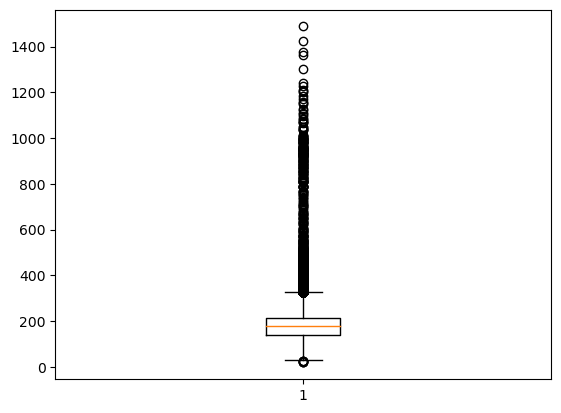

In [24]:
plt.boxplot(df['len_text'])

In [25]:
count = 0
max_threshold = df['len_text'].std() *3 + df['len_text'].mean()
min_threshold = abs(df['len_text'].mean() - df['len_text'].std() *3)

for numbers in df['len_text']:
    if numbers > max_threshold or numbers < min_threshold:
        count += 1
print(f'totla outliers : {count}')        


#Any value that lies beyond the threshold is consider an outlier. Threshold is distance of 3 standard deviations from the mean.
#This is because for a normally distributed data, 99% of the values lie within 3 standard deviations from the mean

totla outliers : 1145


In [26]:
df = df[(df['len_text'] < max_threshold) & (df['len_text'] > min_threshold)]
df.shape

(188281, 10)

In [27]:
df['headline_short_description'][0]

'Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID Boosters  Health experts said it is too early to predict whether demand would match up with the 171 million doses of the new boosters the U.S. ordered for the fall.'

In [28]:
df['New_category'] = "__label__" + df['New_category'].astype(str)
df['New_category'].unique()

array(['__label__News_and_Current_Affairs',
       '__label__Lifestyle_and_Culture', '__label__Health_and_Wellness',
       '__label__Business_and_Finance', '__label__Specific_Topics',
       '__label__Diversity_and_Voices', '__label__Special_Interest'],
      dtype=object)

In [29]:
df['category_description'] = df['New_category'] + " " + df['headline_short_description']

In [30]:
df['category_description'][0]

'__label__News_and_Current_Affairs Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID Boosters  Health experts said it is too early to predict whether demand would match up with the 171 million doses of the new boosters the U.S. ordered for the fall.'

In [31]:
import re

def preprocess(text):
    text = re.sub(r'[^\w\s\']', ' ', text)
    text = re.sub(r' +', ' ', text)
    return text.strip().lower()

In [32]:
df['category_description'] = df['category_description'].map(preprocess)

In [33]:
df['category_description'][0]

'__label__news_and_current_affairs over 4 million americans roll up sleeves for omicron targeted covid boosters health experts said it is too early to predict whether demand would match up with the 171 million doses of the new boosters the u s ordered for the fall'

In [34]:
df.dtypes

link                                  object
headline                              object
category                              object
short_description                     object
authors                               object
date                          datetime64[ns]
New_category                          object
num_category                          object
headline_short_description            object
len_text                               int64
category_description                  object
dtype: object

In [35]:
df.drop(['link', 'headline', 'category', 'short_description', 'authors', 'date', 'len_text'], axis = 1, inplace = True)

In [36]:
df.head()

,New_category,num_category,headline_short_description,category_description
0,__label__News_and_Current_Affairs,0,Over 4 Million Americans Roll Up Sleeves For O...,__label__news_and_current_affairs over 4 milli...
1,__label__News_and_Current_Affairs,0,"American Airlines Flyer Charged, Banned For Li...",__label__news_and_current_affairs american air...
2,__label__Lifestyle_and_Culture,1,23 Of The Funniest Tweets About Cats And Dogs ...,__label__lifestyle_and_culture 23 of the funni...
3,__label__Health_and_Wellness,2,The Funniest Tweets From Parents This Week (Se...,__label__health_and_wellness the funniest twee...
4,__label__News_and_Current_Affairs,0,Woman Who Called Cops On Black Bird-Watcher Lo...,__label__news_and_current_affairs woman who ca...


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188281 entries, 0 to 189425
Data columns (total 4 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   New_category                188281 non-null  object
 1   num_category                188281 non-null  object
 2   headline_short_description  188281 non-null  object
 3   category_description        188281 non-null  object
dtypes: object(4)
memory usage: 11.2+ MB


In [38]:
train, test = train_test_split(df, test_size = 0.2)

In [39]:
train.head()

,New_category,num_category,headline_short_description,category_description
29467,__label__News_and_Current_Affairs,0,Texas Grandmother Freed By Obama Heading Back ...,__label__news_and_current_affairs texas grandm...
134048,__label__Health_and_Wellness,2,4 Ways to Have a Healthy Fall Fall is almost ...,__label__health_and_wellness 4 ways to have a ...
16717,__label__Lifestyle_and_Culture,1,'Roseanne' Reboot Shows A Family 'That Is Divi...,__label__lifestyle_and_culture 'roseanne' rebo...
60177,__label__News_and_Current_Affairs,0,Clinton Campaign: Trump Needs To Guarantee He ...,__label__news_and_current_affairs clinton camp...
124104,__label__Lifestyle_and_Culture,1,Stephen Colbert's 'The Hobbit' Cameo Pops Up O...,__label__lifestyle_and_culture stephen colbert...


In [40]:
train.shape, test.shape

((150624, 4), (37657, 4))

In [41]:
test.head()

,New_category,num_category,headline_short_description,category_description
132270,__label__Health_and_Wellness,2,Final Days With Your Pet: How Music Can Help Y...,__label__health_and_wellness final days with y...
84251,__label__News_and_Current_Affairs,0,Inside Biden's Final Deliberations It went do...,__label__news_and_current_affairs inside biden...
98205,__label__Lifestyle_and_Culture,1,"Are Mermaids, Unicorns and Dragons Real? Some...",__label__lifestyle_and_culture are mermaids un...
114584,__label__Lifestyle_and_Culture,1,CityLove: Meet Atlanta Burned to the ground b...,__label__lifestyle_and_culture citylove meet a...
153531,__label__Health_and_Wellness,2,Kids and Team Sports: Should Parents Push Thei...,__label__health_and_wellness kids and team spo...


In [42]:
train.to_csv("newscategory_train.text", columns=["category_description"], index = False, header = False)
test.to_csv("newscategory_test.text", columns=["category_description"],  index = False, header = False)

## FastText Model

In [43]:
model = fasttext.train_unsupervised(input="newscategory_train.text")

In [44]:
df['vector'] = df['headline_short_description'].apply(lambda x: model.get_word_vector(x))

In [45]:
df.head()

,New_category,num_category,headline_short_description,category_description,vector
0,__label__News_and_Current_Affairs,0,Over 4 Million Americans Roll Up Sleeves For O...,__label__news_and_current_affairs over 4 milli...,"[-0.026898403, 0.03343957, -0.048142094, -0.09..."
1,__label__News_and_Current_Affairs,0,"American Airlines Flyer Charged, Banned For Li...",__label__news_and_current_affairs american air...,"[0.015680786, 0.06786515, 0.0070151514, -0.130..."
2,__label__Lifestyle_and_Culture,1,23 Of The Funniest Tweets About Cats And Dogs ...,__label__lifestyle_and_culture 23 of the funni...,"[0.010689174, 0.0031293368, -0.07495423, -0.08..."
3,__label__Health_and_Wellness,2,The Funniest Tweets From Parents This Week (Se...,__label__health_and_wellness the funniest twee...,"[0.023222513, 0.07895377, -0.030581767, -0.100..."
4,__label__News_and_Current_Affairs,0,Woman Who Called Cops On Black Bird-Watcher Lo...,__label__news_and_current_affairs woman who ca...,"[-0.0052022357, 0.054090414, -0.031428166, -0...."


In [46]:
x = df['vector']
y = df['num_category']

In [47]:
x= np.stack(x)

In [48]:
scaler = MinMaxScaler()

X = scaler.fit_transform(x)

In [49]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size = 0.2, random_state = 0, stratify = y)

In [50]:
# MultinomialNB

clf_MNB = MultinomialNB()

clf_MNB.fit(xtrain, ytrain)
ypred_MNB = clf_MNB.predict(xtest)

train_MNB =clf_MNB.score(xtrain, ytrain)
test_MNB =clf_MNB.score(xtest, ytest)
print(f'Train Acc: {train_MNB}\nTest Acc: {test_MNB}\n\nClassification Report:\n{classification_report(ytest, ypred_MNB)} ')

Train Acc: 0.4099479498619078
Test Acc: 0.40898106593727596

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.21      0.33      9539
           1       0.38      0.99      0.55     13513
           2       0.15      0.00      0.00      7617
           3       0.00      0.00      0.00      1777
           4       0.00      0.00      0.00      1462
           5       0.00      0.00      0.00      2769
           6       0.00      0.00      0.00       980

    accuracy                           0.41     37657
   macro avg       0.19      0.17      0.13     37657
weighted avg       0.37      0.41      0.28     37657
 


In [51]:
# KNeighborsClassifier

clf_kn = KNeighborsClassifier()

clf_kn.fit(xtrain, ytrain)
ypred_kn = clf_kn.predict(xtest)

train_kn =clf_kn.score(xtrain, ytrain)
test_kn =clf_kn.score(xtest, ytest)
print(f'Train Acc: {train_kn}\nTest Acc: {test_kn}\n\nClassification Report:\n{classification_report(ytest, ypred_kn)} ')

Train Acc: 0.7336081899298916
Test Acc: 0.6309849430384789

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.76      0.72      9539
           1       0.66      0.72      0.69     13513
           2       0.58      0.69      0.63      7617
           3       0.53      0.29      0.38      1777
           4       0.48      0.26      0.34      1462
           5       0.44      0.17      0.24      2769
           6       0.41      0.13      0.20       980

    accuracy                           0.63     37657
   macro avg       0.54      0.43      0.46     37657
weighted avg       0.61      0.63      0.61     37657
 


In [52]:
# RandomForestClassifier

clf_rf = RandomForestClassifier()
clf_rf.fit(xtrain, ytrain)

y_pred = clf_rf.predict(xtest)

rf_train = clf_rf.score(xtrain,ytrain)
rf_test = clf_rf.score(xtest, ytest)

print(f'Train ACC: {rf_train}\nTest ACC: {rf_test}\n\n{classification_report(ytest, y_pred)}')

Train ACC: 1.0
Test ACC: 0.6393764771490028

              precision    recall  f1-score   support

           0       0.66      0.80      0.72      9539
           1       0.63      0.80      0.70     13513
           2       0.63      0.66      0.65      7617
           3       0.62      0.14      0.22      1777
           4       0.69      0.09      0.15      1462
           5       0.67      0.06      0.12      2769
           6       0.80      0.04      0.07       980

    accuracy                           0.64     37657
   macro avg       0.67      0.37      0.38     37657
weighted avg       0.65      0.64      0.59     37657

